In [1]:
import os
import librosa
import pydaisi as pyd

speech_emotion_recognition = pyd.Daisi("soul0101/Speech Emotion Recognition")

[09:07:25] INFO     Calling https://app.daisi.io/pebble-api/daisies/connect?name=soul0101/Speech     ]8;id=801035;file://c:\Users\91983\anaconda3\envs\face\lib\site-packages\pydaisi\pydaisi.py\pydaisi.py]8;;\:]8;id=396087;file://c:\Users\91983\anaconda3\envs\face\lib\site-packages\pydaisi\pydaisi.py#411\411]8;;\
                    Emotion Recognition                                                                            

[09:07:28] INFO     Found existing Daisi: bc367901-9e78-4adf-99dd-3a3a58f8b365                       ]8;id=554025;file://c:\Users\91983\anaconda3\envs\face\lib\site-packages\pydaisi\pydaisi.py\pydaisi.py]8;;\:]8;id=602373;file://c:\Users\91983\anaconda3\envs\face\lib\site-packages\pydaisi\pydaisi.py#424\424]8;;\

In [2]:
# Load audio file 

with open("./test-rec.wav", "rb") as f:
    audio_data, sample_rate = librosa.load(f, sr=16000) 

In [3]:
predictions = speech_emotion_recognition.predict_emotion_from_stream(audio_data, sample_rate).value
predictions

[['Disgust', 'Disgust', 'Happy'], array([3., 4., 5.])]

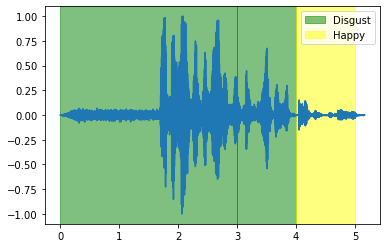

In [4]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
time = np.linspace(0, len(audio_data) / sample_rate, num=len(audio_data))
plt.plot(time, audio_data)
emotion_colors = {'Angry': 'red', 'Disgust': 'green', 'Fear': 'purple', 'Happy': 'yellow', 'Neutral' : 'grey', 'Sad': 'blue', 'Surprise': 'orange'}

for i in range(len(predictions[1])):
    if i == 0:
        plt.axvspan(0, predictions[1][i], color = emotion_colors[predictions[0][i]], alpha=0.5, zorder=-100, label=predictions[0][i])
    else:
        plt.axvspan(predictions[1][i-1], predictions[1][i], color = emotion_colors[predictions[0][i]], alpha=0.5, zorder=-100, label=predictions[0][i])

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.show()